In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
np.random.seed(42)

In [3]:
df = pd.read_excel('products.xlsx', usecols=['id', 'condition', 'category'], keep_default_na=False);

In [4]:
# Dataset clean up
img_name_pat = 'm\d+'
df_filter = df['id'].str.contains(img_name_pat, na=False)
df = df[df_filter]
df.head()

category condition            id
0  Studio Recording Equipment       New  m46490058971
1  Studio Recording Equipment       New  m41956262411
2  Studio Recording Equipment      Good  m48699763030
3  Studio Recording Equipment  Like New  m41645959650
4  Studio Recording Equipment      Good  m42480670580

<BarContainer object of 5 artists>

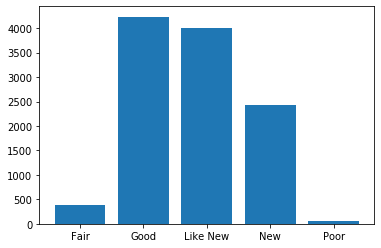

In [17]:
hist = df.groupby('condition').count().id;
plt.bar(hist.keys(), hist)

In [6]:
data = (ImageList.from_df(df, path='.', folder='img_n', cols='id', suffix='.jpg')
        .split_by_rand_pct()
        .label_from_df(cols=['condition'], label_cls=CategoryList)
        .transform(get_transforms(), size=300)
        .databunch(bs=32).normalize(imagenet_stats))

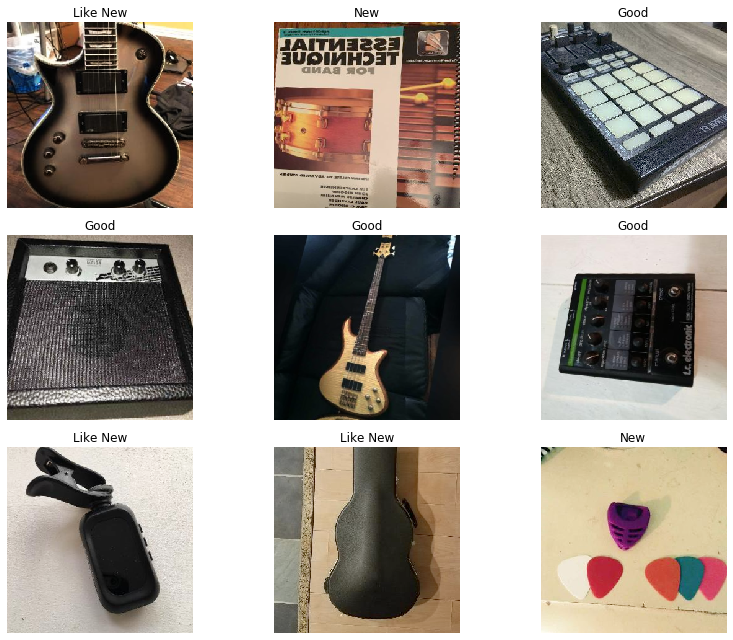

In [7]:
data.show_batch(rows=3, figsize=(12,9))

In [8]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


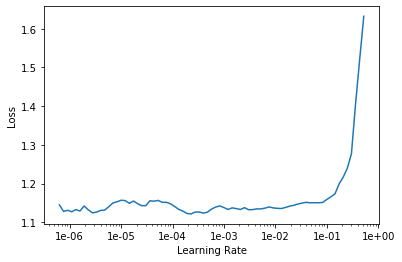

In [15]:
learn.lr_find()
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(5, max_lr=1e-2)
learn.save('condition-resnet34-stage4')

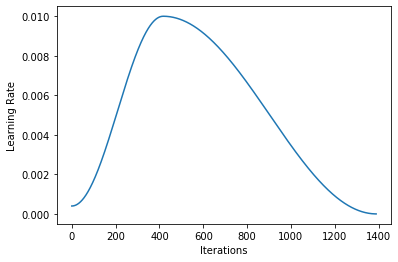

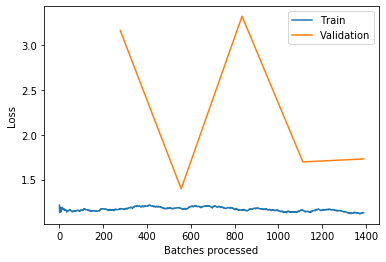

In [17]:
learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [24]:
learn.load('condition-resnet34-stage4');

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

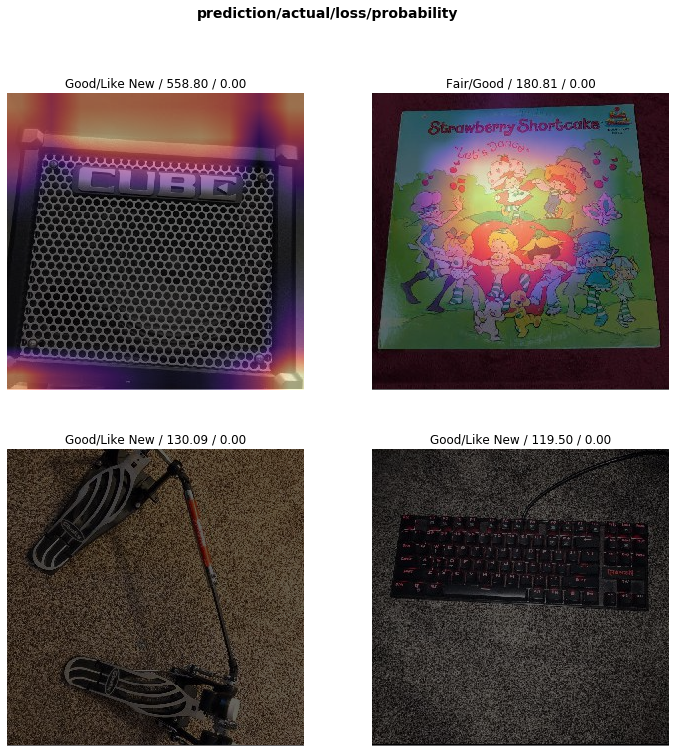

In [26]:
interp.plot_top_losses(4, figsize=(12,12))

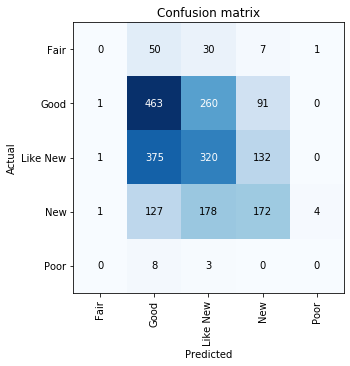

In [27]:
interp.plot_confusion_matrix(figsize=(5,5))

In [28]:
learn.validate()

[1.7305471, tensor(0.4294)]

In [29]:
learn.export('public_models/cv-condition.pkl')